In [1]:
!pip install missingno


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
#Importing all essential liabraries
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 


from sklearn.metrics import accuracy_score
import time

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Data Exploration :

In [5]:
# Feature Description:
# UTC - The time when experiment was performed.
# Temperature - Temperature of Surroundings. Measured in Celsius
# Humidity - The air humidity during the experiment.
# TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
# eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
# Raw H2 - The amount of Raw Hydrogen present in the surroundings.
# Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
# Pressure - Air pressure. Measured in hPa
# PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
# PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
# NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
# NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
# NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
# CNT - Simple Count.
# Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.

In [6]:
data = pd.read_csv('sensor_detection.csv',index_col = False)
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [7]:
data.shape

(62630, 16)

In [8]:
data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
UTC,62630.000000,1654792066.184273,110002.488078,1654712187.000000,1654743244.250000,1654761919.500000,1654777576.750000,1655130051.000000
Unnamed: 0,62630.000000,31314.500000,18079.868017,0.000000,15657.250000,31314.500000,46971.750000,62629.000000
Raw Ethanol,62630.000000,19754.257912,609.513156,15317.000000,19435.000000,19501.000000,20078.000000,21410.000000
Raw H2,62630.000000,12942.453936,272.464305,10668.000000,12830.000000,12924.000000,13109.000000,13803.000000
CNT,62630.000000,10511.386157,7597.870997,0.000000,3625.250000,9336.000000,17164.750000,24993.000000
TVOC[ppb],62630.000000,1942.057528,7811.589055,0.000000,130.000000,981.000000,1189.000000,60000.000000
Pressure[hPa],62630.000000,938.627649,1.331344,930.852000,938.700000,938.816000,939.418000,939.861000
eCO2[ppm],62630.000000,670.021044,1905.885439,400.000000,400.000000,400.000000,438.000000,60000.000000
NC0.5,62630.000000,491.463608,4265.661251,0.000000,8.820000,12.450000,14.420000,61482.030000
NC1.0,62630.000000,203.586487,2214.738556,0.000000,1.384000,1.943000,2.249000,51914.680000


In [9]:
#Getting all the unique values in each feature
features = data.columns
for feature in features:
    print(f"{feature} ---> {data[feature].nunique()}")

Unnamed: 0 ---> 62630
UTC ---> 62630
Temperature[C] ---> 21672
Humidity[%] ---> 3890
TVOC[ppb] ---> 1966
eCO2[ppm] ---> 1713
Raw H2 ---> 1830
Raw Ethanol ---> 2659
Pressure[hPa] ---> 2213
PM1.0 ---> 1337
PM2.5 ---> 1351
NC0.5 ---> 3093
NC1.0 ---> 4113
NC2.5 ---> 1161
CNT ---> 24994
Fire Alarm ---> 2


In [10]:
# Null Value Distribution:

In [11]:
data.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

<Axes: >

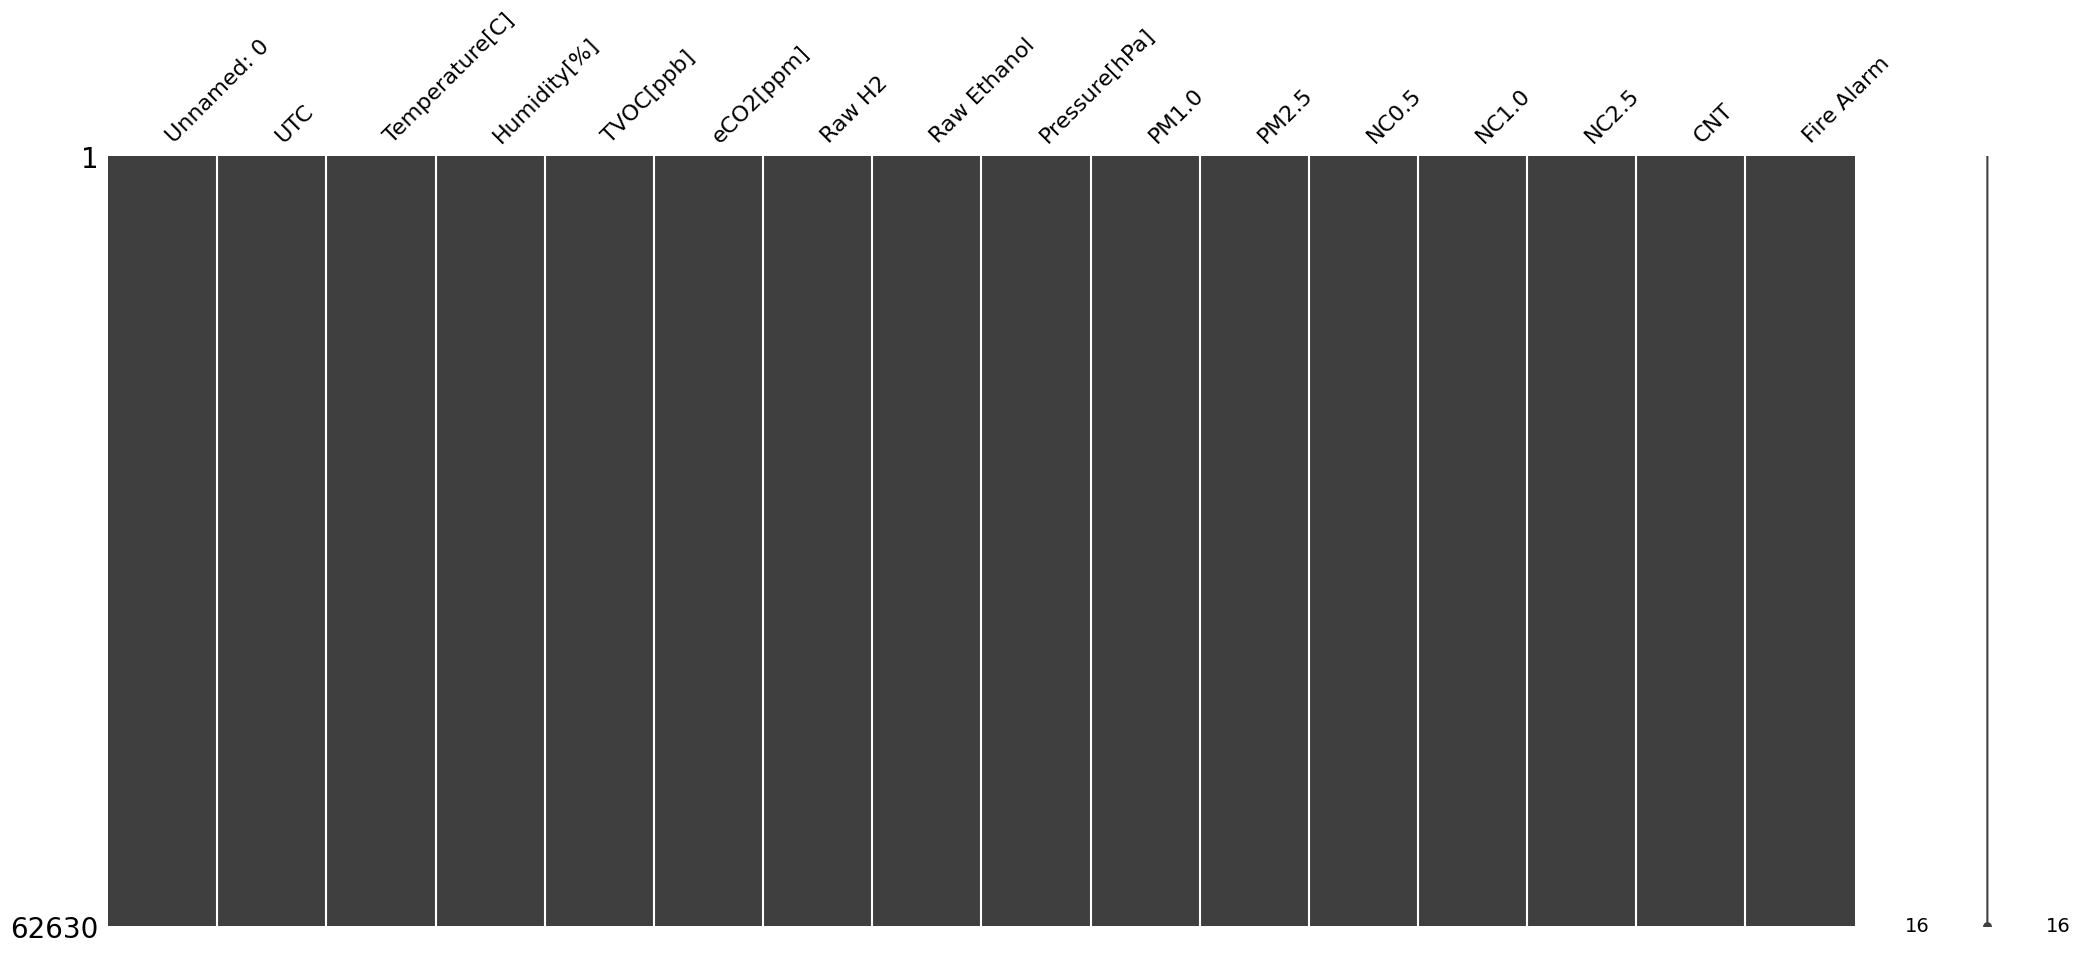

In [12]:
msno.matrix(data)

In [13]:
# Data Cleaning:
# We do not have any missing value in the dataset hence now we can analyse the data much better and build accurate models for prediction. If the dataset would contain missing values, check the below given links to help you know the process of Data cleaning :

# Getting Started With Kaggle
# Geek for Geeks
# Although there are some features which are totally useless and can hamper our model. Those are :

# UTC - It just tells us the time when the experiment was performed, hence it does not impact the results.
# Unnamed :0 - It's just the indexing.
# CNT - It is basically the count (similar to indexing).
# Since these attributes are useless, we will drop them.

In [14]:
# Data Cleaning Steps.
# STEP 1. Find the Dirt.

# Start data cleaning by determining what is wrong with your data.
# Look for the following:

# Are there rows with empty values? Entire columns with no data? Which data is missing and why?

# How is data distributed? Remember, visualizations are your friends. Plot outliers. Check distributions to see which groups or ranges are more heavily represented in your dataset.

# Keep an eye out for the weird: are there impossible values? Like “date of birth: male”, “address: -1234”.

# Is your data consistent? Why are the same product names written in uppercase and other times in camelCase?

# Wear your detective hat and jot down everything interesting, surprising or even weird.

# STEP 2: SCRUB THE DIRT

# The other half is solving it. How do you solve it, though?
# One ring might rule them all, but one approach is not going to cut it with all your data cleaning problems.

# Depending on the type of data dirt you’re facing, you’ll need different cleaning techniques.

# Step 2 is broken down into eight parts:

# Missing Data
# Outliers Contaminated
# Data Inconsistent
# Data Invalid
# Data Duplicate
# Data Data Type Issues
# Structural Errors
# STEP 2.1: MISSING DATA

# Sometimes you will have rows with missing values. Sometimes, almost entire columns will be empty.

# What to do with missing data? Ignoring it is like ignoring the holes in your boat while at sea - you’ll sink.

# Start by spotting all the different disguises missing data wears. It appears in values such as 0, “0”, empty strings, “Not Applicable”, “NA”, “#NA”, None, NaN, NULL or Inf. Programmers before you might have put default values instead of missing data (“email@company.com”).

# When you have a general idea of what your missing data looks like, it is time to answer the crucial question:

# “> Is missing data telling me something valuable?”

# There are 3 main approaches to cleaning missing data:

# 1.Drop rows and/or columns with missing data. If the missing data is not valuable, just drop the rows (i.e. specific customers, sensor reading, or other individual exemplars) from your analysis. If entire columns are filled with missing data, drop them as well. There is no need to analyze the column “Quantity of NewAwesomeProduct Bought” if no one has bought it yet.
# 2.Recode missing data into a different format. Numerical computations can break down with missing data. Recoding missing values into a different column saves the day. For example, the column “payment_date” with empty rows can be recoded into a column “payed_yet” with 0 for “no” and 1 for “yes”.
# 3.Fill in missing values with “best guesses.” Use moving averages and backfilling to estimate the most probable values of data at that point. This is especially crucial for time-series analyses, where missing data can distort your conclusions.

# STEP 2.2: OUTLIERS

# utliers are data points which are at an extreme.

# They usually have very high or very low values:

# An antarctic sensor reading the temperature of 100º
# A customer who buys $0.01 worth of merchandise per year
# How to interpret those?

# Outliers usually signify either very interesting behavior or a broken collection process.

# Both are valuable information (hey, check your sensors, before checking your outliers), but proceed with cleaning only if the behavior is actually interesting.

# There are three approaches to dealing with outliers:

# Remove outliers from the analysis. Having outliers can mess up your analysis by bringing the averages up or down and in general distorting your statistics. Remove them by removing the upper and lower X-percentile of your data.
# Segment data so outliers are in a separate group. Put all the “normal-looking” data in one group, and outliers in another. This is especially useful for analysis of interest. You might find out that your highest paying customers, who actually buy 3 times above average, are an interesting target for marketing and sales.
# Keep outliers, but use different statistical methods for analysis. Weighted means (which put more weight on the “normal” part of the distribution) and trimmed means are two common approaches of analyzing datasets with outliers, without suffering the negative consequences of outliers.
# STEP 2.3: CONTAMINATED DATA

# Contaminated data is another red flag for your collection process.

# Examples of contaminated data include:

# Wind turbine data in your water plant dataset.
# Purchase information in your customer address dataset.
# Future data in your current event time-series data.
# The last one is particularly sneaky.

# Imagine having a row of financial trading information for each day.

# Columns (or features) would include the date, asset type, asking price, selling price, the difference in asking price from yesterday, the average asking price for this quarter.

# The average asking price for this quarter is the source of contamination.

# You can only compute the averages once the quarter is over, but that information would not be given to you on the trading date - thus introducing future data, which contaminates the present data.

# With corrupted data, there is not much you can do except for removing it. This requires a lot of domain expertise.

# When lacking domain knowledge, consult non-analytical members of your team. Make sure to also fix any leakages your data collection pipeline has so that the data corruption does not repeat with future data collection.

# STEP 2.4: INCONSISTENT DATA

# “Wait, did we sell ‘Apples’, ‘apples’, or ‘APPLES’ this month? And what is this ‘monitor stand’ for $999 under the same product ID?”

# You have to expect inconsistency in your data.

# Especially when there is a higher possibility of human error (e.g. when salespeople enter the product info on proforma invoices manually).

# The best way to spot inconsistent representations of the same elements in your database is to visualize them.

# Plot bar charts per product category.

# Do a count of rows by category if this is easier.

# When you spot the inconsistency, standardize all elements into the same format.

# Humans might understand that ‘apples’ is the same as ‘Apples’ (capitalization) which is the same as ‘appels’ (misspelling), but computers think those three refer to three different things altogether.

# Lowercasing as default and correcting typos are your friends here.

# STEP 2.5: INVALID DATA

# Similarly, to corrupted data, invalid data is illogical.

# For example, users who spend -2 hours on our app, or a person whose age is 170.

# Unlike corrupted data, invalid data does not result from faulty collection processes, but from issues with data processing (usually during feature preparation or data cleaning).

# Let us walk through an example:

# You are preparing a report for your CEO about the average time spent in your recently launched mobile app.

# Everything works fine, the activities time looks great, except for a couple of rogue examples.

# You notice some users spent -22 hours in the app. Digging deeper, you go to the source of this anomaly.

# In-app time is calculated as finish_hour - start_hour. In other words, someone who started using the app at 23:00 and finished at 01:00 in the morning would have for their time_in_app -22 hours (1 - 23 = - 22).

# Upon realizing that, you can correct the computations to prevent such illogical data.

# Cleaning invalid data mostly means amending the functions and transformations which caused the data to be invalid. If this is not possible, we remove the invalid data.

# STEP 2.6: DUPLICATE DATA

# Duplicate data means the same values repeating for an observation point.

# This is damaging to our analysis because it can either deflate/inflate our numbers (e.g. we count more customers than there actually are, or the average changes because some values are more often represented).

# There are different sources of duplicate data:

# Data are combined from different sources, and each source brings in the same data to our database.

# The user might submit information twice by clicking on the submit button.

# Our data collection code is off and inserts the same records multiple times.

# There are three ways to eliminate duplicates:

# Find the same records and delete all but one.
# Pairwise match records, compare them and take the most relevant one (e.g. the most recent one)
# Combine the records into entities via clustering (e.g. the cluster of information about customer Harpreet Sahota, which has all the data associated with it).
# STEP 2.7: DATA TYPE ISSUES

# Depending on which data type you work with (DateTime objects, strings, integers, decimals or floats), you can encounter problems specific to data types.

# 2.7.1 Cleaning string

# Strings are usually the messiest part of data cleaning because they are often human-generated and hence prone to errors.

# The common cleaning techniques for strings involve:

# Standardizing casing across the strings
# Removing whitespace and newlines
# Removing stop words (for some linguistic analyses)
# Hot-encoding categorical variables
# represented as strings
# Correcting typos
# Standardizing encodings
# Especially the last one can cause a lot of problems. Encodings are the way of translating between the 0’s and 1’s of computers and the human- readable representation of text.

# And as there are different languages, there are different encodings.

# Everyone has seen strings of the type �����. Which meant our browser or computer could not decode the string. It is the same as trying to play a cassette on your gramophone. Both are made for music, but they represent it in different ways.

# When in doubt, go for UTF-8 as your encoding standard.

# STEP 2.7: DATA TYPE ISSUES

# 2.7.2 Cleaning date and time

# Dates and time can be tricky. Sometimes the error is not apparent until doing computations (like the activity duration example above) on date and times.

# The cleaning process involves:

# Making sure that all your dates and times are either a DateTime object or a Unix timestamp (via type coercion). Do not be tricked by strings pretending to be a DateTime object, like “24 Oct 2019”. Check for data type and coerce where necessary.

# Internationalization and time zones. DateTime objects are often recorded with the time zone or without one. Either of those can cause problems. If you are doing region-specific analysis, make sure to have DateTime in the correct timezone. If you do not care about internationalization, convert all DateTime objects to your timezone.

# STEP 2.8: STRUCTURAL ERRORS

# Even though we treated data issues comprehensively, there is a class of problems with data, which arise due to structural errors.

# STEP 3: RINSE AND REPEAT

# Once cleaned, you repeat steps 1 and 2.

# This is helpful for three reasons:

# You might have missed something. Repeating the cleaning process helps you catch those pesky hidden issues.
# Through cleaning, you discover new issues. For example, once you removed outliers from your dataset, you noticed that data is not bell- shaped anymore and needs reshaping before you can analyze it.
# You learn more about your data. Every time you sweep through your dataset and look at the distributions of values, you learn more about your data, which gives you hunches as to what to analyze.
# Data scientists spend 80% of their time cleaning and organizing data because of the associated benefits.

# Or as the old machine learning wisdom goes:

# Garbage in, garbage out.

# All algorithms can do is spot patterns.

# And if they need to spot patterns in a mess, they are going to return “mess” as the governing pattern.

# Clean data beats fancy algorithms any day.

# But cleaning data is not in the sole domain of data science. High-quality data are necessary for any type of decision-making.

# From startups launching the next Google search algorithm to business enterprises relying on Microsoft Excel for their business intelligence - clean data is the pillar upon which data-driven decision-making rests.

# AUTOMATE YOUR DATA CLEANING

# By now it is clear how important data cleaning is.

# But it still takes way too long. And it is not the most intellectually stimulating challenge.

# To avoid losing time, while not neglecting the data cleaning process, data practitioners automate a lot of repetitive cleaning tasks.

# Mainly there are two branches of data cleaning that you can automate:

# Problem discovery. Use any visualization tools that allow you to quickly visualize missing values and different data distributions.

# Transforming data into the desired form. The majority of data cleaning is running reusable scripts, which perform the same sequence of actions. For example: 1) lowercase all strings, 2) remove whitespace, 3) break down strings into words.

# Whether automation is your cup of tea or not, remember the main steps when cleaning data:

# Identify the problematic data
# Clean the data
# Remove, encode, fill in any missing data
# Remove outliers or analyze them separately
# Purge contaminated data and correct leaking pipelines
# Standardize inconsistent data
# Check if your data makes sense (is valid)
# Deduplicate multiple records of the same dataForesee and prevent type issues (string issues, DateTime issues)
# Remove engineering errors (aka structural errors)
# Rinse and repeat
# Keep a list of those steps by your side and make sure your data gives you the valuable insights you need.

In [15]:
del_features = ['Unnamed: 0','UTC','CNT']
for feature in del_features:
    data = data.drop(feature,axis = 1)
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [16]:
data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
Raw Ethanol,62630.000000,19754.257912,609.513156,15317.000000,19435.000000,19501.000000,20078.000000,21410.000000
Raw H2,62630.000000,12942.453936,272.464305,10668.000000,12830.000000,12924.000000,13109.000000,13803.000000
TVOC[ppb],62630.000000,1942.057528,7811.589055,0.000000,130.000000,981.000000,1189.000000,60000.000000
Pressure[hPa],62630.000000,938.627649,1.331344,930.852000,938.700000,938.816000,939.418000,939.861000
eCO2[ppm],62630.000000,670.021044,1905.885439,400.000000,400.000000,400.000000,438.000000,60000.000000
NC0.5,62630.000000,491.463608,4265.661251,0.000000,8.820000,12.450000,14.420000,61482.030000
NC1.0,62630.000000,203.586487,2214.738556,0.000000,1.384000,1.943000,2.249000,51914.680000
PM2.5,62630.000000,184.467770,1976.305615,0.000000,1.340000,1.880000,2.180000,45432.260000
PM1.0,62630.000000,100.594309,922.524245,0.000000,1.280000,1.810000,2.090000,14333.690000
NC2.5,62630.000000,80.049042,1083.383189,0.000000,0.033000,0.044000,0.051000,30026.438000


In [17]:
# Exploratory Data Analysis :

<Axes: xlabel='Fire Alarm', ylabel='Count'>

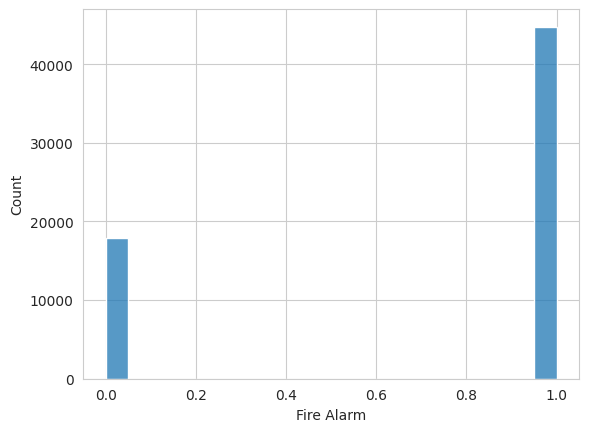

In [19]:
# Feature Analysis Using Target Variable :
sns.set_style("whitegrid")
sns.histplot(data['Fire Alarm'])

<Axes: xlabel='TVOC[ppb]', ylabel='Density'>

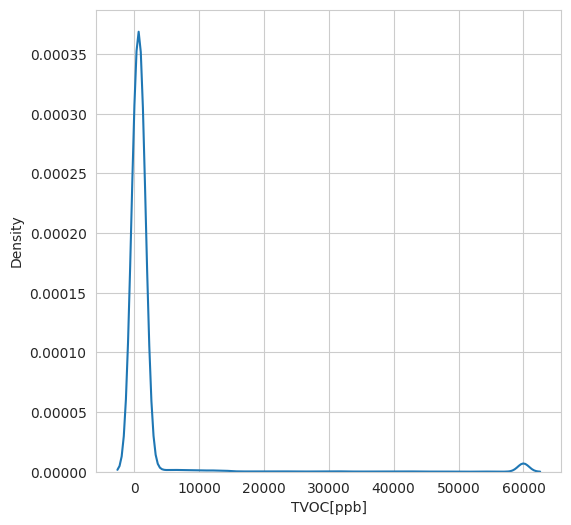

In [20]:
plt.figure(figsize = (6,6))
sns.kdeplot(data = data,x = 'TVOC[ppb]')

In [21]:
features = data.keys()
features.drop('Fire Alarm')
subsets = ['TVOC[ppb]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']
data.groupby('Fire Alarm')[features].mean().style\
.bar(subset = subsets,color = 'red')

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Fire Alarm,,,,,,,,,,,,,
0,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259,0.000000
1,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627,1.000000


In [22]:
data.groupby('Fire Alarm')[features].median().style\
.bar(subset = subsets,color = 'red')

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Fire Alarm,,,,,,,,,,,,,
0,20.540000,46.140000,86.000000,400.000000,12837.000000,20158.000000,937.478000,1.450000,1.520000,9.970000,1.578000,0.039000,0.000000
1,20.020000,51.400000,1103.000000,404.000000,12933.000000,19454.000000,938.878000,1.870000,1.940000,12.860000,2.005000,0.045000,1.000000


<Axes: >

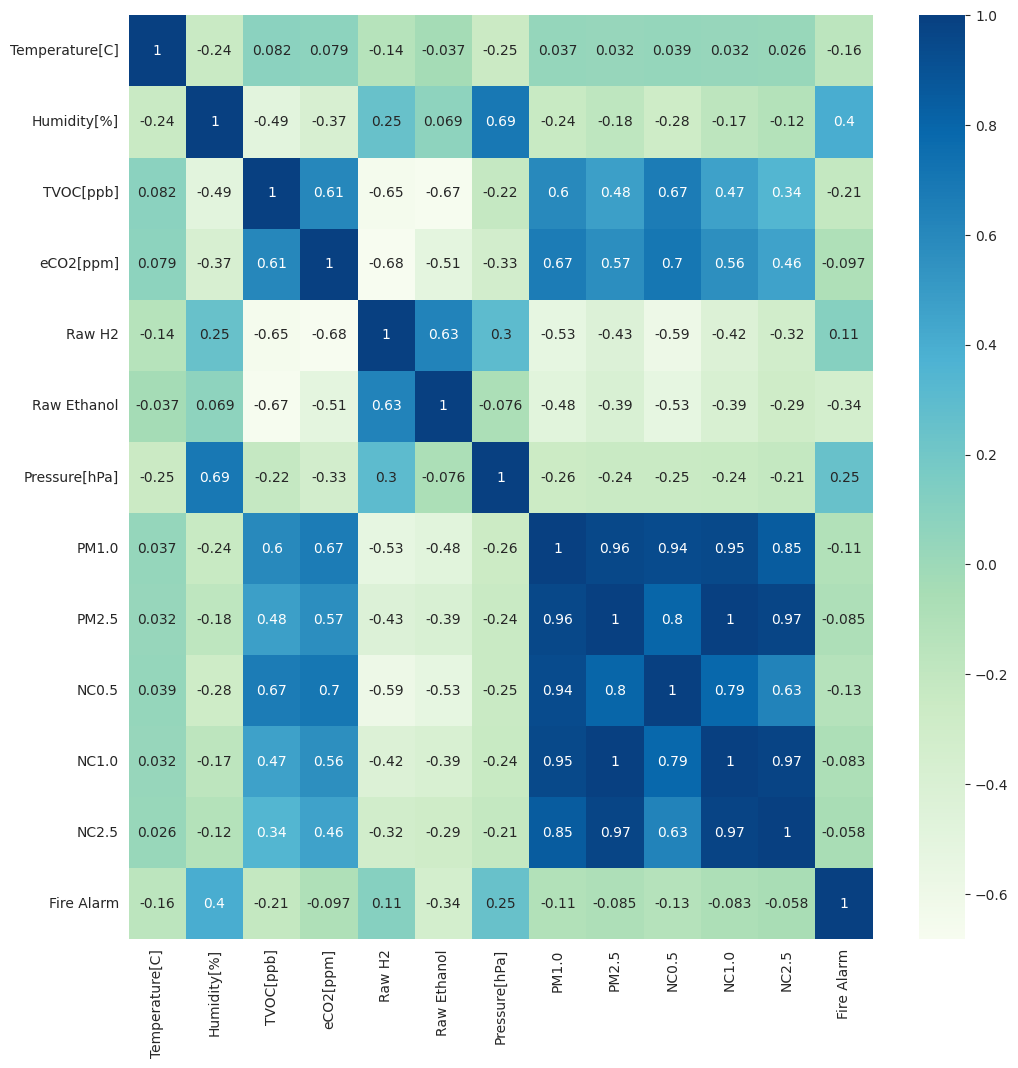

In [23]:
# HeatMap :
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(),annot = True,cmap = 'GnBu')

In [ ]:
# Modelling :

In [24]:
# Data Pre-Processing:

In [25]:
X = data.copy()
X.drop('Fire Alarm',axis = 1,inplace = True)
y = data['Fire Alarm']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [27]:
# Model Implementation:

In [28]:
models = [KNeighborsClassifier(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),BaggingClassifier(),SVC(),GaussianNB(),DummyClassifier(),ExtraTreeClassifier()]

In [29]:
Name = []
Accuracy = []
Time_Taken = []
for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy.append(accuracyScore)
    Time_Taken.append(end-begin)

In [30]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Time Taken
0,KNeighborsClassifier,0.998164,0.520108
1,SGDClassifier,0.906674,0.045585
2,LogisticRegression,0.897972,0.224900
3,RandomForestClassifier,1.000000,4.831624
4,GradientBoostingClassifier,0.999521,12.218766
5,AdaBoostClassifier,0.996807,2.401843
6,BaggingClassifier,0.999840,1.331469
7,SVC,0.968306,13.109250
8,GaussianNB,0.766326,0.008209
9,DummyClassifier,0.712199,0.000655


In [31]:
# Accuracy vs Model:

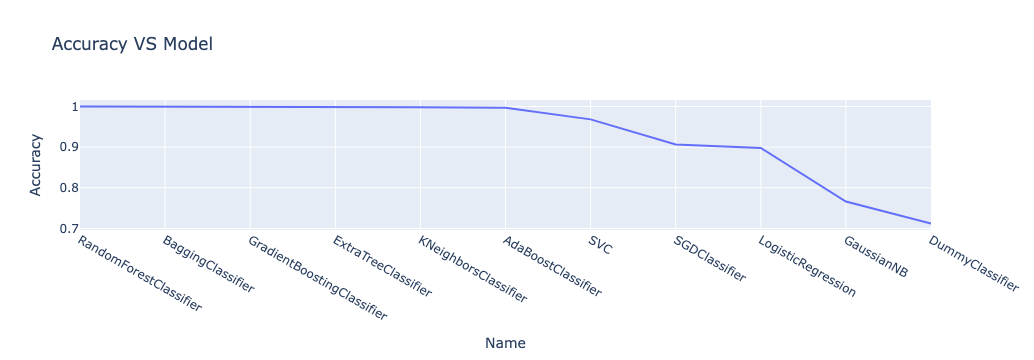

In [32]:
model_df.sort_values(by = 'Accuracy',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Accuracy", title='Accuracy VS Model')
fig.show()

In [33]:
# Time Taken vs Model:

In [34]:
model_df.sort_values(by = 'Time Taken',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Time Taken", title='Time Taken VS Model')
fig.show()